In [14]:
import keras
import tensorflow

# **Data definition**

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

# **Data split**

We will create our train, test and validation sets

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

hereafter the first 5 elements of our dataset

In [50]:
import matplotlib.pyplot as plt

def plot_img(image_data, num_rows=1):
    num_cols=len(image_data)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
    for i, ax in enumerate(axes.flat):
        ax.imshow(image_data[i].reshape(28, 28), cmap="binary")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

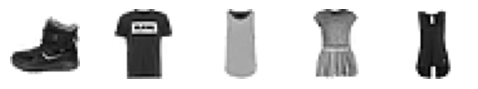

In [27]:
plot_img(X_train_full[:5])

In [37]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [38]:
len(X_train)

55000

by deviding by 255.0 we reduce pixel definition, it will be a float between 0 and 1

# **Creation of each class**

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# **Model creation**

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

This model have :

*   a first layer wich convert each image into a matrix of pixels 28x28
*   2 hidden layers activation : relu
*   an output layer activation  : softmax



In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


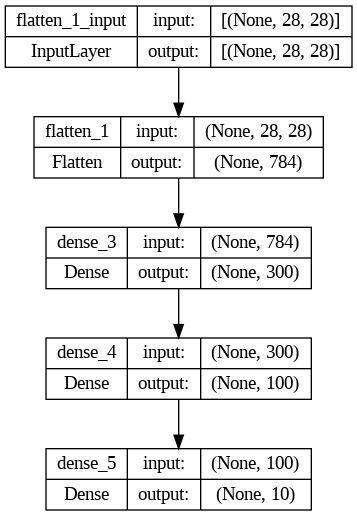

In [43]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

# **Model training**

In [39]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7783 - accuracy: 0.7559 - val_loss: 0.5127 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4866 - accuracy: 0.8294 - val_loss: 0.4388 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4416 - accuracy: 0.8461 - val_loss: 0.4368 - val_accuracy: 0.8462
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4139 - accuracy: 0.8547 - val_loss: 0.3939 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3940 - accuracy: 0.8612 - val_loss: 0.3739 - val_accuracy: 0.8730
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3787 - accuracy: 0.8660 - val_loss: 0.3705 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3641 - accuracy: 0.8720 - val_loss: 0.3655 - val_accuracy

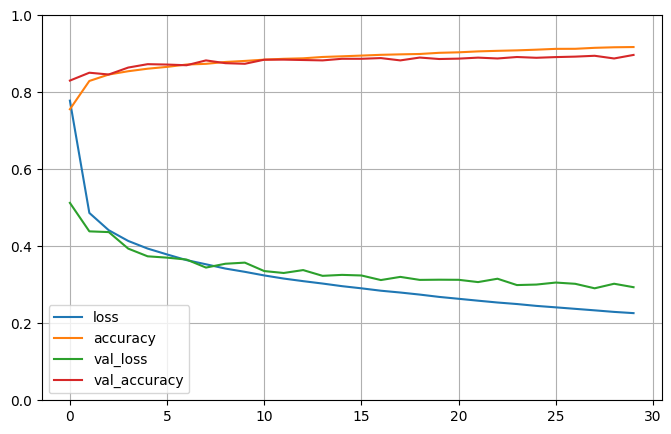

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 58.0926 - accuracy: 0.8569


[58.09260559082031, 0.8568999767303467]

# **Test / Predictions**

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

y_proba.round(2)

1/1 [==============================] - 0s 166ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([9, 2, 1])

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

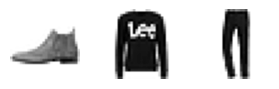

In [51]:
plot_img(X_new)

The model is right for this predictions